In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

from explore import group_tenure, group_monthly_charges, start_explore, plot_data, get_df

In [2]:
train = start_explore()
df = get_df(train)

In [3]:
# What does the customer who churns look like?
with pd.option_context('display.max_columns', None):
    display(df[df.churn == 'Yes'].describe())

,tenure,monthly_charges,total_charges,senior_citizen,gender_enc,family_support,phone_service_enc,contract_type_id,internet_service_type_id,extra_lines,internet_services,has_internet,online_security_enc,online_backup_enc,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
count,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,19.311,76.133,1667.299,0.247,0.472,0.712,0.936,1.191,1.834,1.426,2.776,0.941,0.173,0.291,0.298,0.191,0.436,0.444,0.709,0.556,0.158,0.138,0.148,0.286
std,20.795,24.157,2014.101,0.432,0.500,0.897,0.245,0.476,0.506,0.611,1.636,0.235,0.379,0.455,0.458,0.394,0.497,0.497,0.455,0.497,0.365,0.345,0.356,0.452
min,1.000,19.400,19.400,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,64.200,156.100,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,10.000,80.450,738.650,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
75%,32.250,95.100,2657.650,0.000,1.000,1.000,1.000,1.000,2.000,2.000,4.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
max,72.000,118.350,8684.800,1.000,1.000,3.000,1.000,3.000,3.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


## 1. Are there clear groupings where a customer is more likely to churn?

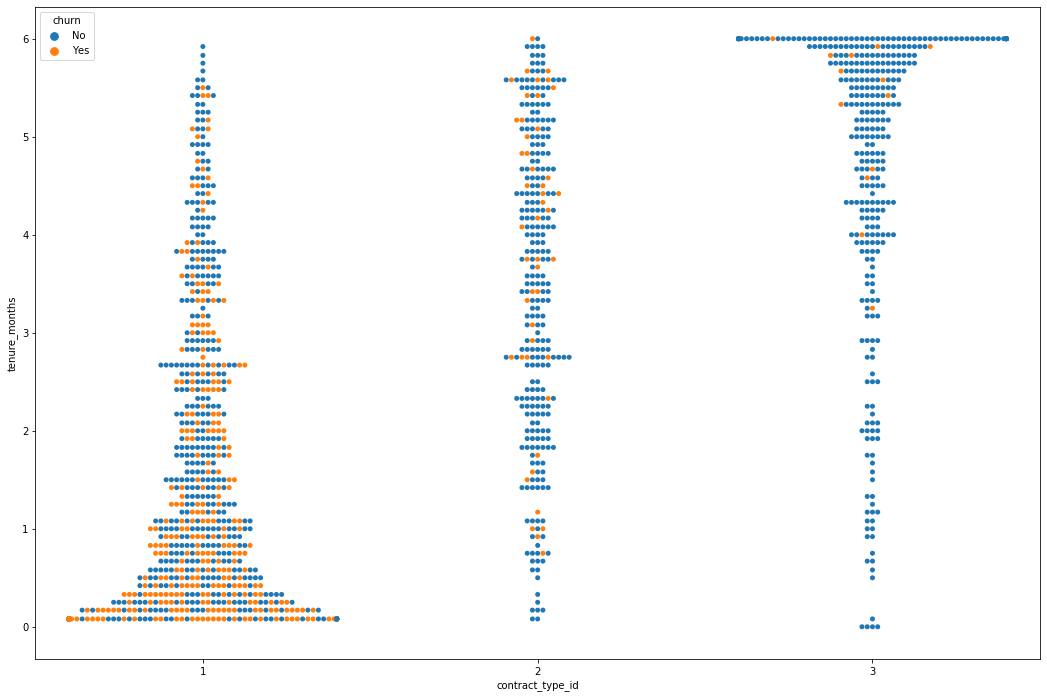

In [4]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='contract_type_id', y="tenure_months", data=train, hue='churn')
plt.show()

#### contract_type_id:
1. month_to_month
2. one_year
3. two_year

*month_to_month contracts appear to have a much larger churn rate compared to one_year and two_year*

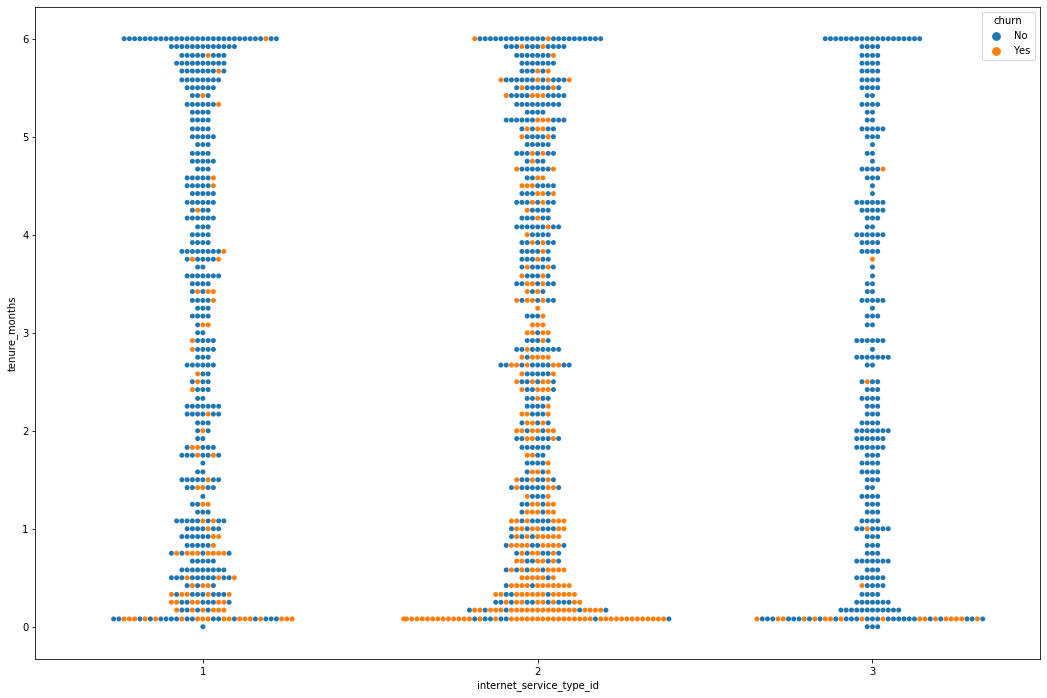

In [5]:
plt.figure(figsize=(18, 12))
sns.swarmplot(x='internet_service_type_id', y="tenure_months", data=train, hue='churn');
plt.show()

#### internet_service_type_id:
1. none
2. DSL
3. fiber

*DSL subscribers appear to have a higher churn rate then the other internet subscribers*

In [6]:
# Find rate of churn for people with phone service only, vs those with internet
# Number of people who churn out of those who have internet / All those with internet
churn_with_internet = df[df.has_internet == 1][df.churn == 'Yes'].shape[0]
all_with_internet = df[df.has_internet == 1].shape[0]

print(f'Churn rate for customers with internet: {churn_with_internet / all_with_internet}')

Churn rate for customers with internet: 0.3376029277218664


In [7]:
churn_phone_only = df[df.has_internet == 0][df.churn == 'Yes'].shape[0]
all_phone_only = df[df.has_internet == 0].shape[0]

print(f'Churn rate for customers with phone only: {churn_phone_only / all_phone_only}')

Churn rate for customers with phone only: 0.07278481012658228


#### Consider the previous isolated to month-to-month contracts

In [8]:
all_churned = df[df.churn == 'Yes'].shape[0]
month_to_month_contract_churned = df[df.contract_type_id == 1][df.churn == 'Yes'].shape[0]
one_year_contrac_churned = df[df.contract_type_id == 2][df.churn == 'Yes'].shape[0]
two_year_contrac_churned = df[df.contract_type_id == 3][df.churn == 'Yes'].shape[0]

month_to_month_contract_churned_rate = month_to_month_contract_churned / all_churned
one_year_contrac_churned_rate = one_year_contrac_churned / all_churned
two_year_contrac_churned_rate = two_year_contrac_churned / all_churned

print ('Churn rate by contract types:')
print (f'Rate of churn for people with month to month contract: {month_to_month_contract_churned_rate}')
print (f'Rate of churn for people with one year contract: {one_year_contrac_churned_rate}')
print (f'Rate of churn for people with two year contrac: {two_year_contrac_churned_rate}\n')

Churn rate by contract types:
Rate of churn for people with month to month contract: 0.8443877551020408
Rate of churn for people with one year contract: 0.11989795918367346
Rate of churn for people with two year contrac: 0.03571428571428571



#### Customers who signed month to month contracts make up 84.4% of those that have churned

In [9]:
# How does 
churn_month_to_month_phone_only = df[df.has_internet == 0][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_dsl_only = df[df.internet_service_type_id == 1][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
churn_month_to_month_fiber_only = df[df.internet_service_type_id == 2][df.churn == 'Yes'][df.contract_type_id == 1].shape[0]
all_phone_only = df[df.has_internet == 0].shape[0]
all_dsl_only = df[df.internet_service_type_id == 1].shape[0]
all_fiber_only = df[df.internet_service_type_id == 2].shape[0]

churn_month_to_month_phone_only_rate = churn_month_to_month_phone_only / all_phone_only
churn_month_to_month_dsl_only_rate = churn_month_to_month_dsl_only / all_dsl_only
churn_month_to_month_fiber_only_rate = churn_month_to_month_fiber_only / all_fiber_only

print ('Churn rates for month to month contracts:')
print (f'Rate of churn for people who have Phone service only: {churn_month_to_month_phone_only_rate}')
print (f'Rate of churn for people who have DSL only: {churn_month_to_month_dsl_only_rate}')
print (f'Rate of churn for people who have fiber: {churn_month_to_month_fiber_only_rate}\n')

Churn rates for month to month contracts:
Rate of churn for people who have Phone service only: 0.06329113924050633
Rate of churn for people who have DSL only: 0.15367965367965367
Rate of churn for people who have fiber: 0.3803486529318542



##### Churn by service type and contract type
- Month to month customers: 
    1. phone service only with apporx 63.3%
    2. fiber only with approx 38%
    3. DSL only with approx. 15.4%

## 2. Are there features that indicate a higher propensity to churn? 

In [10]:
DSL = df[df.phone_service_enc == 0][df.contract_type_id == 1]
FO = df[df.phone_service_enc == 0][df.contract_type_id == 2]
DSL2 = df[df.contract_type_id == 1]
FO2 = df[df.contract_type_id == 2]

In [11]:
# Here i'll turn each of those categories into variables and look at their rate of churn

num_internet_only = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1].shape[0]
internet_only_churn = df[df.has_internet == 1][df.phone_service_enc == 0][df.internet_services == 1][df.churn == 'Yes'].shape[0]
internet_rate = (internet_only_churn / num_internet_only)

num_phone_only = df[df.has_internet == 0][df.phone_service_enc == 1].shape[0]
phone_only_churn = df[df.has_internet == 0][df.phone_service_enc == 1][df.churn == 'Yes'].shape[0]
phone_rate = (phone_only_churn / num_phone_only)

num_all = df.shape[0]
num_churn = df[df.churn == 'Yes'].shape[0]
all_rate = (num_churn / num_all)

# customers without phone
num_DSL = DSL.shape[0]
DSL_churn = DSL[df.churn == 'Yes'].shape[0]
DSL_rate = (DSL_churn / num_DSL)

num_FO = FO.shape[0]
FO_churn = FO[df.churn == 'Yes'].shape[0]
FO_rate = (FO_churn / num_FO)

# all DSL customers, even with phone
num_DSL2 = DSL2.shape[0]
DSL2_churn = DSL2[df.churn == 'Yes'].shape[0]
DSL2_rate = (DSL2_churn / num_DSL2)

# all Fiber Optic customers, even with phone
num_FO2 = FO2.shape[0]
FO2_churn = FO2[df.churn == 'Yes'].shape[0]
FO2_rate = (FO2_churn / num_FO2)

print (f'Rate of churn for people who have DSL: {DSL2_rate}')
print (f'Rate of churn for people who have Fiber Optic: {FO2_rate}')
print (f'Rate of churn for people who only have DSL: {DSL_rate}')
print (f'Rate of churn for people who only have Fiber Optic: {FO_rate}')
print (f'Rate of churn for people who only have internet: {internet_rate}')
print (f'Rate of churn for people who only have phone: {phone_rate}')
print (f'Overal rate of churn: {all_rate}')

Rate of churn for people who have DSL: 0.4355263157894737
Rate of churn for people who have Fiber Optic: 0.15666666666666668
Rate of churn for people who only have DSL: 0.3620689655172414
Rate of churn for people who only have Fiber Optic: 0.09090909090909091
Rate of churn for people who only have internet: 0.45454545454545453
Rate of churn for people who only have phone: 0.07278481012658228
Overal rate of churn: 0.2782114975159688


In [12]:
num_DSL_online_sec = DSL2[df.online_security_enc == 1].shape[0]
DSL_online_sec_churn = DSL2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
DSL_online_sec_rate = (DSL_online_sec_churn / num_DSL_online_sec)

num_FO_online_sec = FO2[df.online_security_enc == 1].shape[0]
FO_online_sec_churn = FO2[df.online_security_enc == 1][df.churn == 'Yes'].shape[0]
FO_online_sec_rate = (FO_online_sec_churn / num_FO_online_sec)

num_DSL_tech = DSL2[df.tech_support_enc == 1].shape[0]
DSL_tech_churn = DSL2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
DSL_tech_rate = (DSL_tech_churn / num_DSL_tech)

num_FO_tech = FO2[df.tech_support_enc == 1].shape[0]
FO_tech_churn = FO2[df.tech_support_enc == 1][df.churn == 'Yes'].shape[0]
FO_tech_rate = (FO_tech_churn / num_FO_tech)

num_DSL_backup = DSL2[df.online_backup_enc == 1].shape[0]
DSL_backup_churn = DSL2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
DSL_backup_rate = (DSL_backup_churn / num_DSL_backup)

num_FO_backup = FO2[df.online_backup_enc == 1].shape[0]
FO_backup_churn = FO2[df.online_backup_enc == 1][df.churn == 'Yes'].shape[0]
FO_backup_rate = (FO_backup_churn / num_FO_backup)

num_DSL_dev_prot = DSL2[df.device_protection_enc == 1].shape[0]
DSL_dev_prot_churn = DSL2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
DSL_dev_prot_rate = (DSL_dev_prot_churn / num_DSL_dev_prot)

num_FO_dev_prot = FO2[df.device_protection_enc == 1].shape[0]
FO_dev_prot_churn = FO2[df.device_protection_enc == 1][df.churn == 'Yes'].shape[0]
FO_dev_prot_rate = (FO_dev_prot_churn / num_FO_dev_prot)

num_DSL_strm_tv = DSL2[df.streaming_tv_enc == 1].shape[0]
strm_DSL_tv_churn = DSL2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_tv_rate = (strm_DSL_tv_churn / num_DSL_strm_tv)

num_FO_strm_tv = FO2[df.streaming_tv_enc == 1].shape[0]
strm_FO_tv_churn = FO2[df.streaming_tv_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_tv_rate = (strm_FO_tv_churn / num_FO_strm_tv)

num_DSL_strm_mv = DSL2[df.streaming_movies_enc == 1].shape[0]
strm_DSL_mv_churn = DSL2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_DSL_mv_rate = (strm_DSL_mv_churn / num_DSL_strm_mv)

num_FO_strm_mv = FO2[df.streaming_movies_enc == 1].shape[0]
strm_FO_mv_churn = FO2[df.streaming_movies_enc == 1][df.churn == 'Yes'].shape[0]
strm_FO_mv_rate = (strm_FO_mv_churn / num_FO_strm_mv)

print ('DSL Churn rates')
print (f'Rate of churn for people who have DSL and online security: {DSL_online_sec_rate}')
print (f'Rate of churn for people who have DSL and tech support: {DSL_tech_rate}')
print (f'Rate of churn for people who have DSL and online backup: {DSL_backup_rate}')
print (f'Rate of churn for people who have DSL and device protection: {DSL_dev_prot_rate}')
print (f'Rate of churn for people who have DSL and streaming tv: {strm_DSL_tv_rate}')
print (f'Rate of churn for people who have DSL and streaming movies: {strm_DSL_mv_rate}')

print ('-----------------------')
print ('Fiber Optic Churn Rates')
print (f'Rate of churn for people who have Fiber Optic and online security: {FO_online_sec_rate}')
print (f'Rate of churn for people who have Fiber Optic and tech support: {FO_tech_rate}')
print (f'Rate of churn for people who have Fiber Optic and online backup: {FO_backup_rate}')
print (f'Rate of churn for people who have Fiber Optic and device protection: {FO_dev_prot_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming tv: {strm_FO_tv_rate}')
print (f'Rate of churn for people who have Fiber Optic and streaming movies: {strm_FO_mv_rate}')

DSL Churn rates
Rate of churn for people who have DSL and online security: 0.2876712328767123
Rate of churn for people who have DSL and tech support: 0.3697478991596639
Rate of churn for people who have DSL and online backup: 0.36363636363636365
Rate of churn for people who have DSL and device protection: 0.46706586826347307
Rate of churn for people who have DSL and streaming tv: 0.5203252032520326
Rate of churn for people who have DSL and streaming movies: 0.50390625
-----------------------
Fiber Optic Churn Rates
Rate of churn for people who have Fiber Optic and online security: 0.1592920353982301
Rate of churn for people who have Fiber Optic and tech support: 0.18018018018018017
Rate of churn for people who have Fiber Optic and online backup: 0.20155038759689922
Rate of churn for people who have Fiber Optic and device protection: 0.21014492753623187
Rate of churn for people who have Fiber Optic and streaming tv: 0.2556390977443609
Rate of churn for people who have Fiber Optic and st

In [13]:
# Churn rate by contract type
month_to_month_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1)).sum() / (train.churn == 'Yes').sum()
one_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 2)).sum() / (train.churn == 'Yes').sum()
two_year_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 3)).sum() / (train.churn == 'Yes').sum()

print('Churn rates by contract type:')
print('- Month-to-month has a {:.2f}% turn over rate'.format(month_to_month_churn_rate * 100))
print('- One year has a {:.2f}% turn over rate'.format(one_year_churn_rate * 100))
print('- Two has a {:.2f}% turn over rate'.format(two_year_churn_rate * 100))

Churn rates by contract type:
- Month-to-month has a 84.44% turn over rate
- One year has a 11.99% turn over rate
- Two has a 3.57% turn over rate


#### Out of all the customers that have churned, month-to-month contracts have the highest rate

In [14]:

one_to_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_to_twenty')).sum() / (train.churn == 'Yes').sum()
twenty_one_to_thirty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'twenty_one_to_thirty')).sum() / (train.churn == 'Yes').sum()
thirty_one_to_forty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'thirty_one_to_forty')).sum() / (train.churn == 'Yes').sum()
forty_one_to_fifty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'forty_one_to_fifty')).sum() / (train.churn == 'Yes').sum()
fifty_one_to_sixty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'fifty_one_to_sixty')).sum() / (train.churn == 'Yes').sum()
sixty_one_to_seventy_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'sixty_one_to_seventy')).sum() / (train.churn == 'Yes').sum()
seventy_one_to_eighty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'seventy_one_to_eighty')).sum() / (train.churn == 'Yes').sum()
eighty_one_to_ninety_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'eighty_one_to_ninety')).sum() / (train.churn == 'Yes').sum()
ninety_one_to_one_hundred_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / (train.churn == 'Yes').sum()
one_hundred_one_to_one_hundred_ten_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / (train.churn == 'Yes').sum()
one_hundred_eleven_to_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / (train.churn == 'Yes').sum()
more_then_one_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / (train.churn == 'Yes').sum()
zero_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'zero')).sum() / (train.churn == 'Yes').sum()

In [15]:
m2m_churn_of_all_churn = \
one_to_twenty_churn_rate + \
twenty_one_to_thirty_churn_rate + \
thirty_one_to_forty_churn_rate + \
forty_one_to_fifty_churn_rate + \
fifty_one_to_sixty_churn_rate + \
sixty_one_to_seventy_churn_rate + \
seventy_one_to_eighty_churn_rate + \
eighty_one_to_ninety_churn_rate + \
ninety_one_to_one_hundred_churn_rate + \
one_hundred_one_to_one_hundred_ten_churn_rate + \
one_hundred_eleven_to_hundred_twenty_churn_rate + \
more_then_one_hundred_twenty_churn_rate + \
zero_churn_rate

In [16]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and one_to_twenty_churn_rate'.format(one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and twenty_one_to_thirty_churn_rate'.format(twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and thirty_one_to_forty_churn_rate'.format(thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and forty_one_to_fifty_churn_rate'.format(forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and fifty_one_to_sixty_churn_rate'.format(fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and sixty_one_to_seventy_churn_rate'.format(sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and seventy_one_to_eighty_churn_rate'.format(seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and eighty_one_to_ninety_churn_rate'.format(eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and ninety_one_to_one_hundred_churn_rate'.format(ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate'.format(one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.3f}%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate'.format(one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and more_then_one_hundred_twenty_churn_rate'.format(more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and zero churn rate'.format(zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 2.55%: Month-to-month and one_to_twenty_churn_rate
- 3.83%: Month-to-month and twenty_one_to_thirty_churn_rate
- 2.30%: Month-to-month and thirty_one_to_forty_churn_rate
- 6.89%: Month-to-month and forty_one_to_fifty_churn_rate
- 5.87%: Month-to-month and fifty_one_to_sixty_churn_rate
- 5.10%: Month-to-month and sixty_one_to_seventy_churn_rate
- 17.35%: Month-to-month and seventy_one_to_eighty_churn_rate
- 17.86%: Month-to-month and eighty_one_to_ninety_churn_rate
- 14.80%: Month-to-month and ninety_one_to_one_hundred_churn_rate
- 7.40%: Month-to-month and one_hundred_one_to_one_hundred_ten_churn_rate
- 0.510%: Month-to-month and one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and zero churn rate


#### - churn, month-to-month, and monthly_charges_group to telco population

In [17]:
overall_one_to_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_to_twenty')).sum() / train.shape[0]
overall_twenty_one_to_thirty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'twenty_one_to_thirty')).sum() / train.shape[0]
overall_thirty_one_to_forty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'thirty_one_to_forty')).sum() / train.shape[0]
overall_forty_one_to_fifty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'forty_one_to_fifty')).sum() / train.shape[0]
overall_fifty_one_to_sixty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'fifty_one_to_sixty')).sum() / train.shape[0]
overall_sixty_one_to_seventy_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'sixty_one_to_seventy')).sum() / train.shape[0]
overall_seventy_one_to_eighty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'seventy_one_to_eighty')).sum() / train.shape[0]
overall_eighty_one_to_ninety_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'eighty_one_to_ninety')).sum() / train.shape[0]
overall_ninety_one_to_one_hundred_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'ninety_one_to_one_hundred')).sum() / train.shape[0]
overall_one_hundred_one_to_one_hundred_ten_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_to_one_hundred_ten')).sum() / train.shape[0]
overall_one_hundred_eleven_to_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'one_hundred_eleven_to_hundred_twenty')).sum() / train.shape[0]
overall_more_then_one_hundred_twenty_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'more_then_one_hundred_twenty')).sum() / train.shape[0]
overall_zero_churn_rate = ((train.churn == 'Yes') & (train.contract_type_id == 1) & (train.monthly_charges_group == 'zero')).sum() / train.shape[0]

In [18]:
overall_churn_rate = \
overall_one_to_twenty_churn_rate + \
overall_twenty_one_to_thirty_churn_rate + \
overall_thirty_one_to_forty_churn_rate + \
overall_forty_one_to_fifty_churn_rate + \
overall_fifty_one_to_sixty_churn_rate + \
overall_sixty_one_to_seventy_churn_rate + \
overall_seventy_one_to_eighty_churn_rate + \
overall_eighty_one_to_ninety_churn_rate + \
overall_ninety_one_to_one_hundred_churn_rate + \
overall_one_hundred_one_to_one_hundred_ten_churn_rate + \
overall_one_hundred_eleven_to_hundred_twenty_churn_rate + \
overall_more_then_one_hundred_twenty_churn_rate + \
overall_zero_churn_rate

In [19]:
print('Churn rates by Month-to-month  and monthly groups:')
print('- {:.2f}%: Month-to-month and overall_one_to_twenty_churn_rate'.format(overall_one_to_twenty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_twenty_one_to_thirty_churn_rate'.format(overall_twenty_one_to_thirty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_thirty_one_to_forty_churn_rate'.format(overall_thirty_one_to_forty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_forty_one_to_fifty_churn_rate'.format(overall_forty_one_to_fifty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_fifty_one_to_sixty_churn_rate'.format(overall_fifty_one_to_sixty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_sixty_one_to_seventy_churn_rate'.format(overall_sixty_one_to_seventy_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_seventy_one_to_eighty_churn_rate'.format(overall_seventy_one_to_eighty_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_eighty_one_to_ninety_churn_rate'.format(overall_eighty_one_to_ninety_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate'.format(overall_ninety_one_to_one_hundred_churn_rate * 100))
print('- {:.2f}%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate'.format(overall_one_hundred_one_to_one_hundred_ten_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate'.format(overall_one_hundred_eleven_to_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate'.format(overall_more_then_one_hundred_twenty_churn_rate * 100))
print('- {:.5f}%: Month-to-month and overall_zero churn rate'.format(overall_zero_churn_rate * 100))

Churn rates by Month-to-month  and monthly groups:
- 0.71%: Month-to-month and overall_one_to_twenty_churn_rate
- 1.06%: Month-to-month and overall_twenty_one_to_thirty_churn_rate
- 0.64%: Month-to-month and overall_thirty_one_to_forty_churn_rate
- 1.92%: Month-to-month and overall_forty_one_to_fifty_churn_rate
- 1.63%: Month-to-month and overall_fifty_one_to_sixty_churn_rate
- 1.42%: Month-to-month and overall_sixty_one_to_seventy_churn_rate
- 4.83%: Month-to-month and overall_seventy_one_to_eighty_churn_rate
- 4.97%: Month-to-month and overall_eighty_one_to_ninety_churn_rate
- 4.12%: Month-to-month and overall_ninety_one_to_one_hundred_churn_rate
- 2.06%: Month-to-month and overall_one_hundred_one_to_one_hundred_ten_churn_rate
- 0.14194%: Month-to-month and overall_one_hundred_eleven_to_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_more_then_one_hundred_twenty_churn_rate
- 0.00000%: Month-to-month and overall_zero churn rate


3. Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?

4. If we looked at churn rate for month-to-month customers after the 12th month and that of 1-year contract customers after the 12th month, are those rates comparable?